# Project Title: 

Sepsis Classification Machine Learning Project with FastAPI Deployment

# Business Understanding

## 1. Introduction
This project focuses on the early detection and classification of sepsis, a life-threatening medical condition. Sepsis is a critical concern in healthcare, and early diagnosis can significantly improve patient outcomes. The objective is to build a robust machine learning model for sepsis classification and deploy it into a web application using FastAPI, making it accessible for real-time predictions.

### 1.1. Objectives
- Understand the Data: 
The primary objective of this project is to gain a comprehensive understanding of the patient data, which includes various health-related features, demographics, and the presence or absence of sepsis. This understanding will empower healthcare professionals and decision-makers to make informed decisions regarding patient care and intervention.

- Predict Sepsis: 
Develop an accurate machine learning classification model that can predict the likelihood of a patient developing sepsis based on the provided features. Early and accurate sepsis prediction is crucial for timely medical intervention and improving patient outcomes.

- Web Application Integration: 
Integrate the trained sepsis classification model into a web application using FAST API. This web application will serve as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve the project objectives, we will follow a structured approach:

- Data Loading and Exploration: 
Begin by loading and exploring the patient data, including features like age, vital signs, and medical history. This step will provide initial insights into the dataset and identify any data quality issues.

- Data Preprocessing: 
Handle missing values, perform feature engineering, and encode categorical variables as needed. Preprocessing steps will ensure that the data is ready for training the machine learning model.

- Model Development: 
Select and implement a suitable machine learning classification model for sepsis prediction. This model will be trained on historical patient data to learn patterns indicative of sepsis.

- Model Evaluation: 
Assess the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation will help identify the model's effectiveness in predicting sepsis cases.

- FAST API Integration: 
Integrate the trained machine learning model into a FAST API-based web application. This application will provide a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

- Testing and Validation: 
Conduct thorough testing and validation of the web application to ensure its reliability and accuracy in real-time sepsis risk assessment.

- Documentation: 
Provide detailed documentation on how to use the web application, including input requirements and interpretation of results.

By following this methodology, we aim to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

# Setup

## Installations

## Importation of Relevant Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

### Loading the Train and Test Datasets

#### Train Dataset

In [14]:
# Load The Train Dataset
train_df = pd.read_csv("data/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Test Dataset

In [15]:
# Load The Test Dataset
test_df = pd.read_csv("data/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


Columns Description (Common to Both Datasets):

- ID: A unique identifier for each patient.
- PRG: Number of pregnancies (applicable only to females).
- PL: Plasma glucose concentration.
- PR: Diastolic blood pressure.
- SK: Triceps skinfold thickness.
- TS: 2-hour serum insulin.
- M11: Body mass index (BMI).
- BD2: Diabetes pedigree function.
- Age: Age of the patient.
- Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No).
Sepsis (Only in Test Dataset): The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

Both datasets contain patient-related information, with the test dataset having an additional "Sepsis" column for target classification. The  dataset is designed for model training, while the test dataset will be used for model evaluation.

# Exploratory Data Analysis (EDA)

## Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Column Information of The Datasets

In [18]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 599 entries (rows) and 11 columns, each with a specific data type.
- The 'ID' column serves as a unique identifier for each patient. 
- The 'Sepssis' column contains categorical data (object) and represents the target variable indicating the presence or absence of sepsis.
- The remaining columns (PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance) contain numerical data.

In [19]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 169 entries (rows) and 10 columns, each with a specific data type.
- Similar to the Train dataset, the 'ID' column serves as a unique identifier for each patient.
- Unlike the Train dataset, the Test dataset does not include the 'Sepssis' column, as it is intended for evaluating sepsis predictions and doesn't contain the target variable.

### ii. Shape of The Datasets

In [22]:
# The shape of the train dataset
train_df.shape

(599, 11)

In [23]:
# The shape of the train dataset
test_df.shape

(169, 10)

### iii. Summary Statistics Datasets

In [32]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [33]:
# Summary Statistics of The Test
test_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000
mean,3.917,123.521,70.426,20.444,81.000,32.250,0.439,33.065,0.728
std,3.402,29.259,19.427,15.765,110.721,7.445,0.307,11.548,0.446
min,0.000,56.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,102.000,62.000,0.000,0.000,27.600,0.223,24.000,0.000
50%,3.000,120.000,74.000,23.000,0.000,32.400,0.343,28.000,1.000
75%,6.000,141.000,80.000,32.000,135.000,36.600,0.587,42.000,1.000
max,13.000,199.000,114.000,49.000,540.000,57.300,1.698,70.000,1.000


i. PRG (Number of Pregnancies):
- The average number of pregnancies is approximately 3.92, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 13 pregnancies.
- Similar to the Train dataset, the majority of patients fall within the range of 1 to 6 pregnancies.

ii. PL (Plasma Glucose Concentration):
- The mean plasma glucose concentration is around 123.52 mg/dL.
- The values range from a minimum of 56 mg/dL to a maximum of 199 mg/dL.
- Similar to the Train dataset, the standard deviation of 29.26 indicates some variability in glucose levels among patients.

iii. PR (Diastolic Blood Pressure):
- The mean diastolic blood pressure is approximately 70.43 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 114 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 62 to 80 mm Hg.

iv. SK (Triceps Skinfold Thickness):
- The mean triceps skinfold thickness is around 20.44 mm.
- The values range from a minimum of 0 mm (which might indicate missing data) to a maximum of 49 mm.
- As in the Train dataset, there is notable variability in skinfold thickness among patients.

v. TS (2-Hour Serum Insulin):
- The mean 2-hour serum insulin level is approximately 81.00 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 540 μU/ml.
- As in the Train dataset, there is significant variability in insulin levels among patients.

vi. M11 (Body Mass Index - BMI):
- The mean BMI is approximately 32.25, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.100 (unusually low) and a maximum of 57.30.
- The standard deviation of 7.45 suggests substantial variability in BMI among patients.

vii. BD2 (Diabetes Pedigree Function):
- The mean diabetes pedigree function value is 0.439, reflecting the diabetes history in family members.
- Values range from a minimum of 0.100 to a maximum of 1.698.
- Similar to the Train dataset, the spread in diabetes pedigree function values indicates varying family histories of diabetes.

viii. Age:
- The average age of patients is approximately 33.07 years, which is similar to the Train dataset.
- Ages range from a minimum of 21 years to a maximum of 70 years.
- Most patients fall within the range of 24 to 42 years.

ix. Insurance:
- About 72.8% of the patients have insurance coverage, based on the mean value, which is slightly higher than in the Train dataset.

### iv. Checking for Missing Values in The Datasets

In [38]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Missing values in the Test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64



Both datasets do not have any missing values

# Univariate Analysis

## i. Univariate Analysis for 'PRG' (Number of Pregnancies)

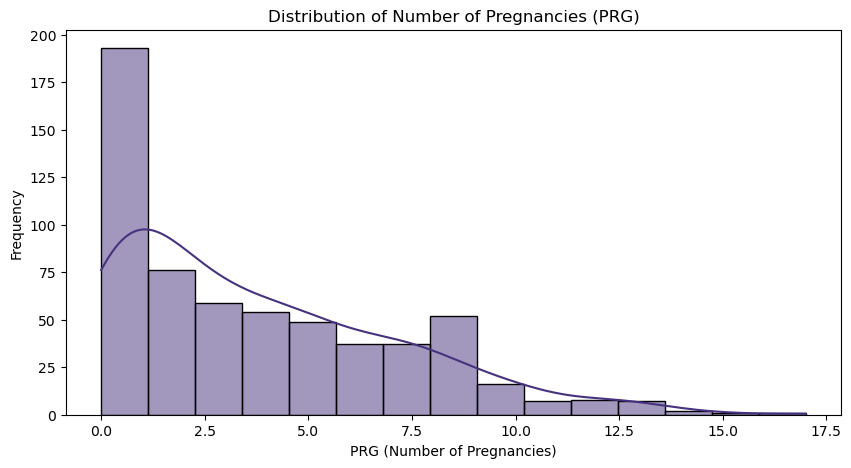

Summary Statistics for Number of Pregnancies (PRG):
count    599.000000
mean       3.824708
std        3.362839
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: PRG, dtype: float64


In [49]:
# Extract the 'PRG' column
prg_values = train_df['PRG']

# Plot a histogram with the viridis color palette
plt.figure(figsize=(10, 5))
sns.histplot(prg_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Number of Pregnancies (PRG)')
plt.xlabel('PRG (Number of Pregnancies)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Number of Pregnancies (PRG):')
print(prg_values.describe())

- The average number of pregnancies is approximately 3.83, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 17 pregnancies.
- The majority of patients fall within the range of 1 to 6 pregnancies.

## ii. Univariate Analysis for 'PL' (Plasma Glucose Concentration)

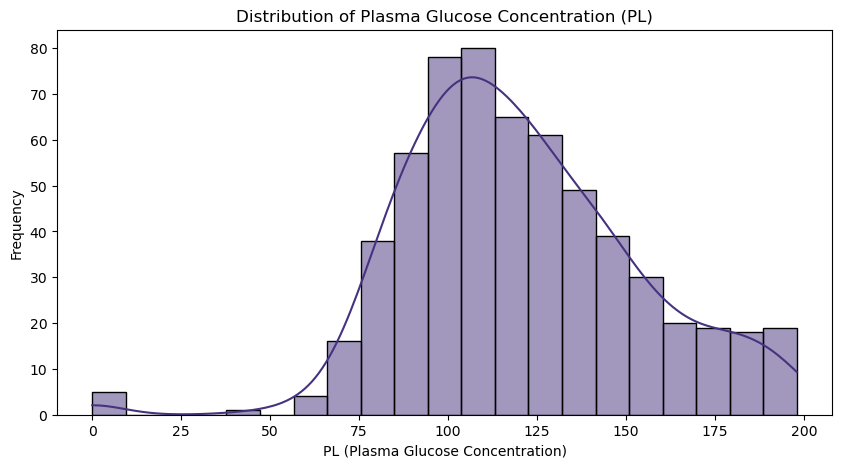

Summary Statistics for Plasma Glucose Concentration (PL):
count    599.000000
mean     120.153589
std       32.682364
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      198.000000
Name: PL, dtype: float64


In [50]:
# Extract the 'PL' column
pl_values = train_df['PL']

# Plot a histogram with the viridis color palette
plt.figure(figsize=(10, 5))
sns.histplot(pl_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Plasma Glucose Concentration (PL)')
plt.xlabel('PL (Plasma Glucose Concentration)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Plasma Glucose Concentration (PL):')
print(pl_values.describe())

- The mean plasma glucose concentration is around 120.15 mg/dL.
- The values range from a minimum of 0 mg/dL (which seems unusual) to a maximum of 198 mg/dL.
- The standard deviation of 32.68 indicates some variability in glucose levels among patients.

## iii. Univariate Analysis for 'PR' (Diastolic Blood Pressure)

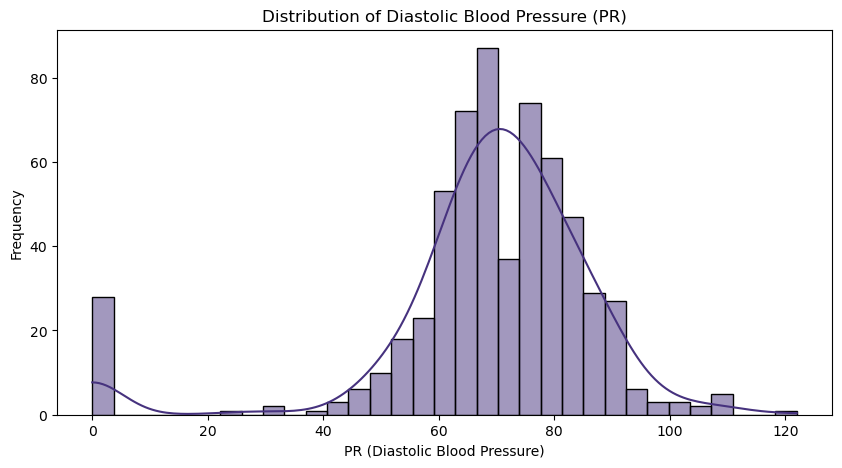

Summary Statistics for Diastolic Blood Pressure (PR):
count    599.000000
mean      68.732888
std       19.335675
min        0.000000
25%       64.000000
50%       70.000000
75%       80.000000
max      122.000000
Name: PR, dtype: float64


In [52]:
# Extract the 'PR' column
pr_values = train_df['PR']

# Plot a histogram with the viridis color palette
plt.figure(figsize=(10, 5))
sns.histplot(pr_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diastolic Blood Pressure (PR)')
plt.xlabel('PR (Diastolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diastolic Blood Pressure (PR):')
print(pr_values.describe())

- The mean diastolic blood pressure is approximately 68.73 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 122 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 64 to 80 mm Hg.

iii. PR (Diastolic Blood Pressure):

- The mean diastolic blood pressure is approximately 68.73 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 122 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 64 to 80 mm Hg.

iv. SK (Triceps Skinfold Thickness):

- The mean triceps skinfold thickness is around 20.56 mm.
- There is a notable spread in skinfold thickness among patients.

v. TS (2-Hour Serum Insulin):

- The mean 2-hour serum insulin level is approximately 79.46 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 846 μU/ml.
- The standard deviation of 116.58 suggests significant variability in insulin levels.

vi. M11 (Body Mass Index - BMI):

- The mean BMI is approximately 31.92, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.078 (unusually low) and a maximum of 67.1.
- The standard deviation of 8.01 suggests substantial variability in BMI among patients.

vii. BD2 (Diabetes Pedigree Function):

- The mean diabetes pedigree function value is 0.481, which reflects the diabetes history in family members.
- Values range from a minimum of 0.078 to a maximum of 2.42.
- The spread in diabetes pedigree function values indicates varying family histories of diabetes.

viii. Age:

- The average age of patients is approximately 33.29 years.
- Ages range from a minimum of 21 years to a maximum of 81 years.
- Most patients fall within the range of 24 to 40 years.

ix. Insurance:

- About 68.6% of the patients have insurance coverage, based on the mean value.